Setting up kaggle:

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vanigupta262","key":"b48c55ab74761553703df104fc237353"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           2766         71  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          11059        196  1.0              
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           3631         68  1.0              
teocalvo/teomewhy-loyalty-system                                T

In [6]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 93% 165M/178M [00:01<00:00, 138MB/s]
100% 178M/178M [00:01<00:00, 164MB/s]


In [7]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [8]:
import pandas as pd

In [9]:
df= pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


EDA:

STEP 1-TRY CONVERTING STRING DATA TO NUMERICS DATA - WORD EMBEDDINGS,

STEP 2-NORMALISE

In [11]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
one_hot = pd.get_dummies(df['type'])

In [13]:
df=df.drop('type',axis=1)
df=df.join(one_hot)

In [14]:
one_hot

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
6362615,False,True,False,False,False
6362616,False,False,False,False,True
6362617,False,True,False,False,False
6362618,False,False,False,False,True


In [15]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [16]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [17]:
df['isFraud'].unique()

array([0, 1])

In [18]:
df['nameOrig_type'] = df['nameOrig'].str[0]

In [19]:
df['nameOrig_type'].unique()

array(['C'], dtype=object)

we noticed that nameorig has prefix which is constant followed by a random no, which is most unlikely to affect fraud/not fraud

In [20]:
df=df.drop(columns=['nameOrig_type','nameOrig'])

In [21]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [22]:
df['nameDest_type'] = df['nameDest'].str[0]

In [23]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C


In [24]:
df['nameDest_type'].unique()

array(['M', 'C'], dtype=object)

In [25]:
df.drop(columns=['nameDest'],inplace=True)

In [26]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C


In [27]:
one_hot = pd.get_dummies(df['nameDest_type'])

In [28]:
df = df.drop('nameDest_type',axis=1)

In [29]:
df = df.join(one_hot)

In [30]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False


Normalise features

In [31]:
def norm_column(df,column):
  df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())

In [32]:
norm_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [33]:
for col in norm_cols:
  norm_column(df,col)

In [34]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False,True
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False,True
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True,False
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True,False
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True,False
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False


  CLASS IMBALANCE

In [35]:
df_isFraud = df[df["isFraud"]==1]

In [36]:
df_isFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True,False
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,False,True,False,False,False,True,False
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True,False
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,False,True,False,False,False,True,False
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,False,True,False,False,False,True,False
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True,False
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,False,True,False,False,False,True,False
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True,False


In [37]:
df_isnotFraud = df[df['isFlaggedFraud']==0]

In [38]:
df_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False,True
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False,True
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True,False
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True,False
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True,False
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False


Here we see that there are vv less Fraud than notFraud, so model is more likely to predict a new transaction as notFraud, So we need to fix this

In [39]:
df_isnotFraud = df_isnotFraud.sample(n=len(df_isFraud))
#this is random

In [40]:
df_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
1093450,0.173854,0.000070,0.000479,0.000444,0.000000,0.000000,0,0,False,False,False,True,False,False,True
1029638,0.064690,0.000053,0.001665,0.001903,0.000000,0.000000,0,0,False,False,False,True,False,False,True
6345445,0.931267,0.000166,0.000355,0.000118,0.000000,0.000000,0,0,False,False,False,True,False,False,True
2647306,0.280323,0.000881,0.002477,0.001334,0.000356,0.000584,0,0,False,True,False,False,False,True,False
5053024,0.475741,0.002401,0.000000,0.000000,0.005752,0.006372,0,0,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172432,0.758760,0.001251,0.000130,0.002490,0.000000,0.000000,0,0,True,False,False,False,False,True,False
5565827,0.528302,0.000021,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False,True
1667133,0.211590,0.000890,0.000000,0.000000,0.000804,0.001034,0,0,False,True,False,False,False,True,False
2109188,0.245283,0.001330,0.001907,0.000000,0.000000,0.000345,0,0,False,True,False,False,False,True,False


LOGISTIC REGRESSION

In [41]:
df = pd.concat([df_isFraud, df_isnotFraud])

In [42]:
#split dataset in features and target variable
feature_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER','C','M']
X = df[feature_cols] # Features
y = df.isFraud # Target variable

In [43]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [44]:
#75-25 SPLIT

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model with increased max_iter
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)


In [46]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True,False
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True,False
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172432,0.758760,0.001251,0.000130,0.002490,0.000000,0.000000,0,0,True,False,False,False,False,True,False
5565827,0.528302,0.000021,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False,True
1667133,0.211590,0.000890,0.000000,0.000000,0.000804,0.001034,0,0,False,True,False,False,False,True,False
2109188,0.245283,0.001330,0.001907,0.000000,0.000000,0.000345,0,0,False,True,False,False,False,True,False


In [47]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1908,  158],
       [ 157, 1884]])

Text(0.5, 427.9555555555555, 'Predicted label')

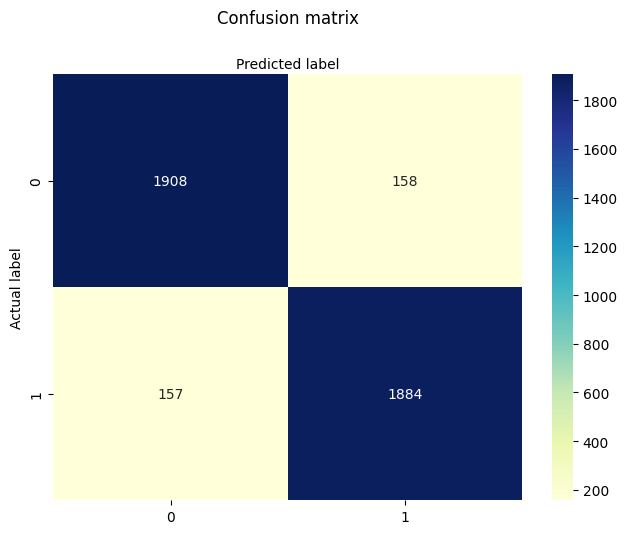

In [48]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [49]:
from sklearn.metrics import classification_report
target_names = ['not fraund', 'fraud']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  not fraund       0.92      0.92      0.92      2066
       fraud       0.92      0.92      0.92      2041

    accuracy                           0.92      4107
   macro avg       0.92      0.92      0.92      4107
weighted avg       0.92      0.92      0.92      4107



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


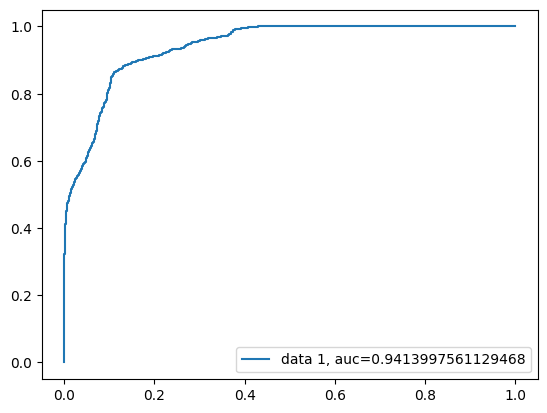

In [50]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Random Forest Classifier

In [51]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [52]:
# Split the data into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = rf.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9893487522824103


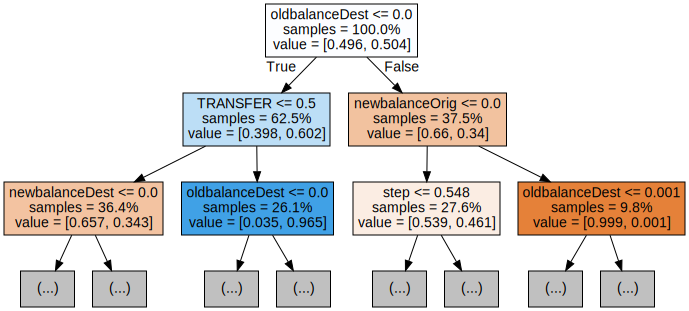

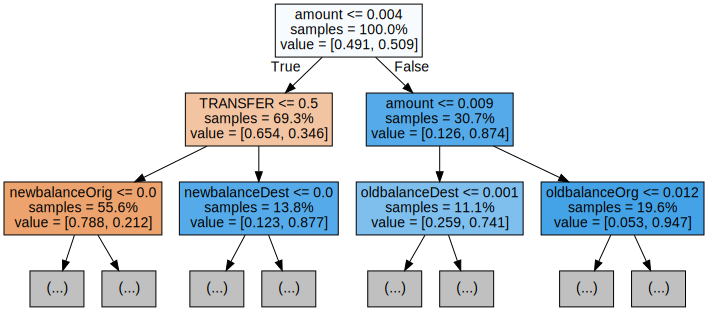

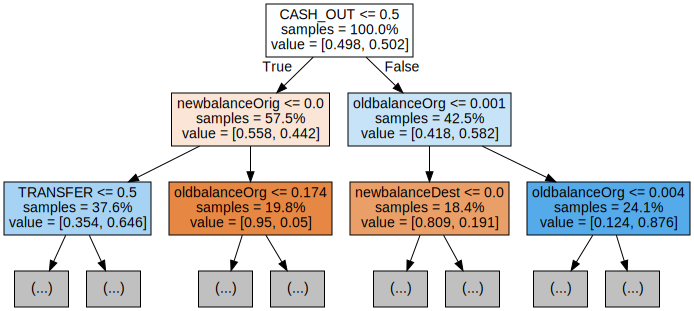

In [56]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [57]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad4388069b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad438806fe0>})

In [58]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 107}


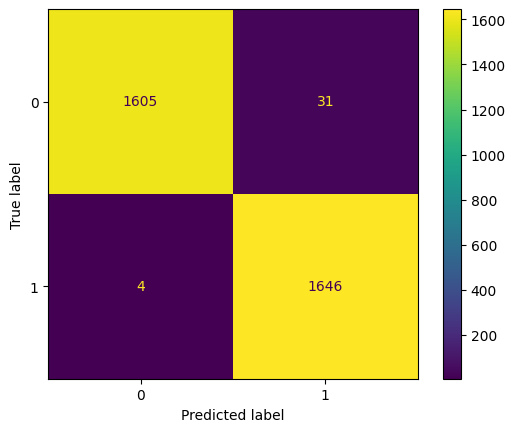

In [59]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the KNN model to your training data (replace X_train and y_train with your actual training data)
knn.fit(X_train, y_train)

# Generate predictions
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9391357273280584
Precision: 0.9409975669099757
Recall: 0.9375757575757576


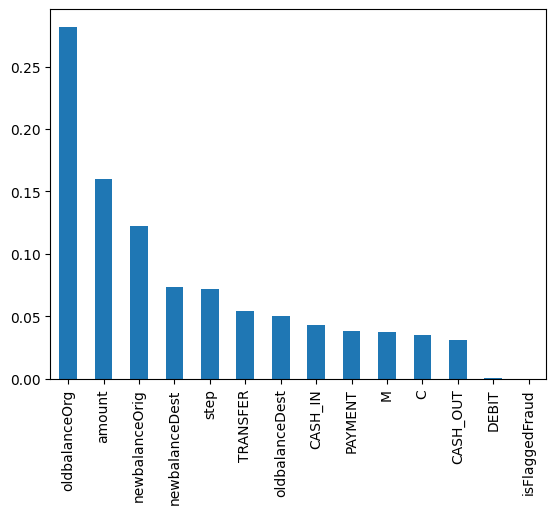

In [61]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [92]:
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

XG Boost

In [62]:
!pip install --user xgboost

!conda install -c conda-forge py-xgboost-cpu


# Use NVIDIA GPU

!conda install -c conda-forge py-xgboost-gpu

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [63]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = df.drop('isFraud', axis=1), df[['isFraud']]

In [64]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [66]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

Using Validation Sets During Training(xg boost part)

XGBoost Classification


LightGBM

In [72]:
# To define the input and output feature
x = df.drop(['isFraud'],axis=1)
y = df.isFraud
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [73]:
!pip install lightgbm
import lightgbm as lgb

# Initialize the model with verbosity control
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42, verbosity=20)
# Remove verbose from fit method
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          eval_metric='logloss')

# Calculate and print the accuracy scores after fitting the model
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

[LightGBM] [Info] Number of positive: 5495, number of negative: 5510
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.227702
[LightGBM] [Debug] init for col-wise cost 0.000205 seconds, init for row-wise cost 0.001254 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 11005, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499318 -> initscore=-0.002726
[LightGBM] [Info] Start training from score -0.002726
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Train

accuracy(testing)- 99.45

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

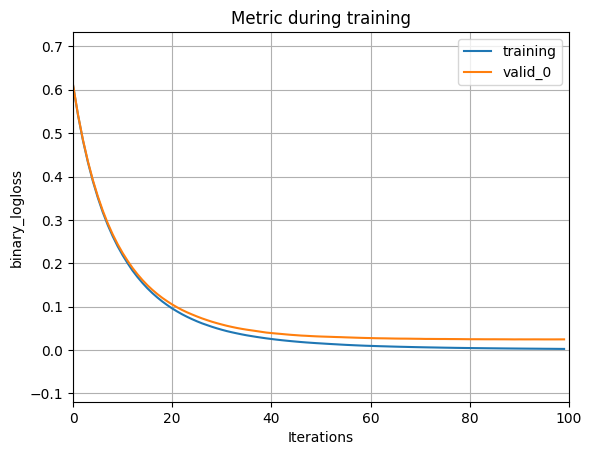

In [74]:
lgb.plot_metric(model)

<Axes: >

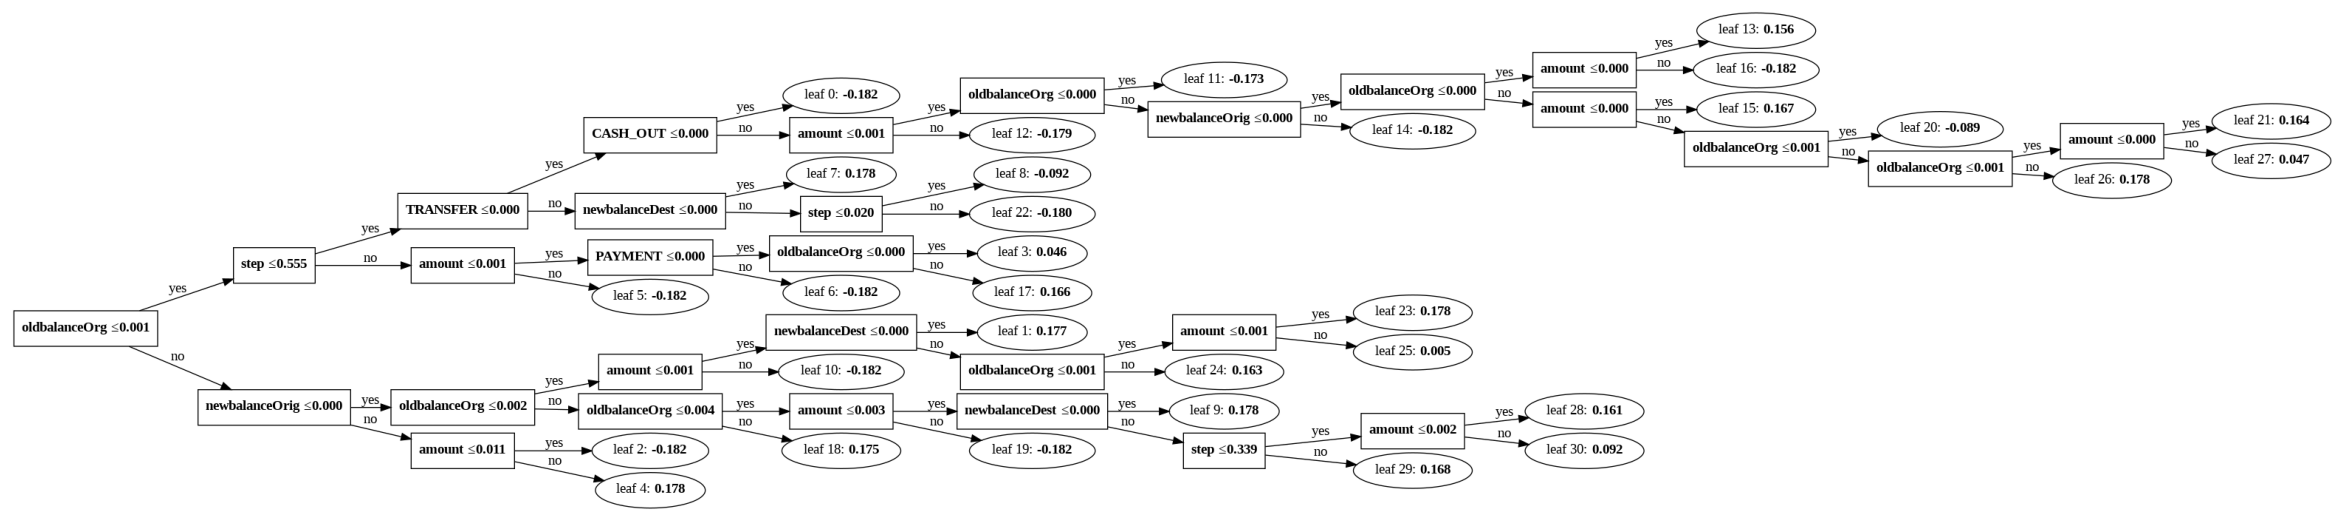

In [75]:
lgb.plot_tree(model,figsize=(30,40))

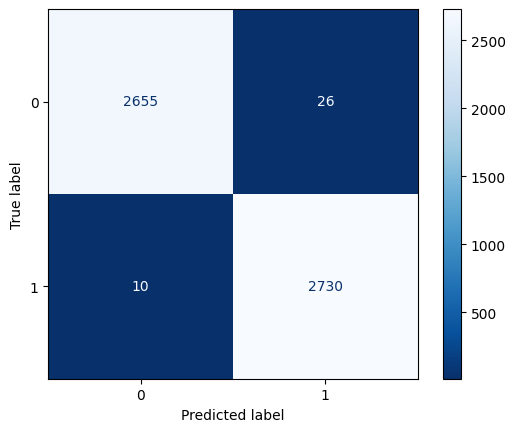

In [76]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'model', 'x_test', and 'y_test' are already defined

cm = confusion_matrix(y_test, model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # Assuming 'model' has a 'classes_' attribute
disp.plot(cmap='Blues_r')
plt.show()

In [77]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2681
           1       0.99      1.00      0.99      2740

    accuracy                           0.99      5421
   macro avg       0.99      0.99      0.99      5421
weighted avg       0.99      0.99      0.99      5421



SVM

SHAP

In [78]:
!pip install shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.1 MB/s eta 0:00:00


In [79]:
import shap
import matplotlib.pyplot as plt


In [80]:
explainer = shap.Explainer(logreg, X_train_scaled)
shap_values = explainer(X_test_scaled)


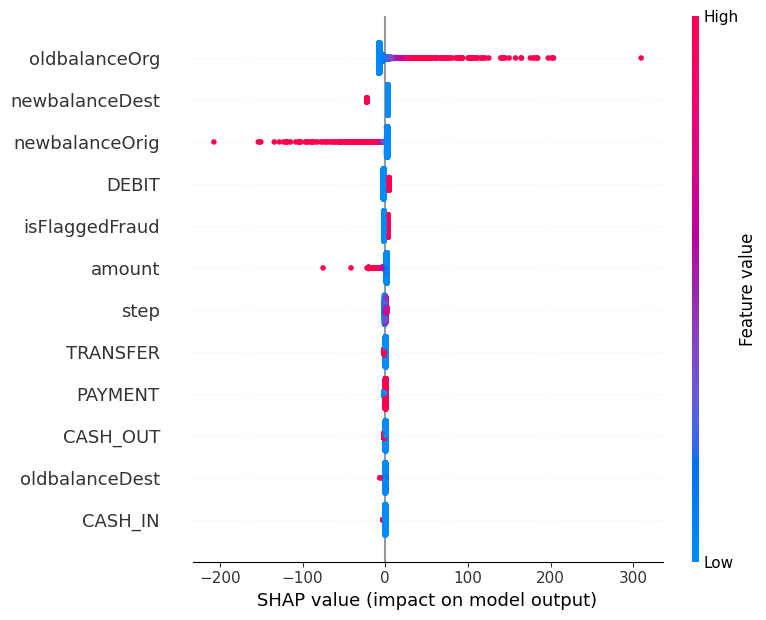

In [81]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


API